<a href="https://colab.research.google.com/github/R4HUL-ROY/Deep_Learning/blob/main/CNN_classifier_hyperparamter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
!pip install keras-tuner

     |████████████████████████████████| 98 kB 3.7 MB/s 


In [2]:
from keras.datasets import mnist

# download mnist data and split into train and test sets
(X_train, y_train), (X_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train=X_train/255.0
X_test=X_test/255.0

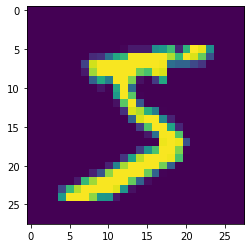

In [4]:
import matplotlib.pyplot as plt

#plot the first image in the dataset
plt.imshow(X_train[0])

In [5]:
#check image shape
X_train[0].shape

(28, 28)

In [6]:
#reshape data to fit the model
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [7]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [8]:
from keras_tuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [9]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist")

In [10]:
tuner_search.search(X_train, y_train, epochs=3,validation_split=0.1)

Trial 5 Complete [00h 01m 22s]
val_accuracy: 0.9861666560173035

Best val_accuracy So Far: 0.9900000095367432
Total elapsed time: 00h 07m 29s
INFO:tensorflow:Oracle triggered exit


In [11]:
model=tuner_search.get_best_models(num_models=1)[0]

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 112)       2912      
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        179264    
                                                                 
 flatten (Flatten)           (None, 25600)             0         
                                                                 
 dense (Dense)               (None, 112)               2867312   
                                                                 
 dense_1 (Dense)             (None, 10)                1130      
                                                                 
Total params: 3,050,618
Trainable params: 3,050,618
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(X_train, y_train, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 25s 14ms/step - loss: 0.0162 - accuracy: 0.9947 - val_loss: 0.0398 - val_accuracy: 0.9912
Epoch 5/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0121 - accuracy: 0.9962 - val_loss: 0.0517 - val_accuracy: 0.9895
Epoch 6/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0101 - accuracy: 0.9966 - val_loss: 0.0471 - val_accuracy: 0.9905
Epoch 7/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0075 - accuracy: 0.9975 - val_loss: 0.0685 - val_accuracy: 0.9887
Epoch 8/10
1688/1688 [==============================] - 24s 15ms/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.0582 - val_accuracy: 0.9898
Epoch 9/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.0046 - accuracy: 0.9988 - val_loss: 0.0532 - val_accuracy: 0.9912
Epoch 10/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.0077 - accuracy: 0.9981 - val_loss: 0.0740 

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0648 - accuracy: 0.9896


[0.06482084840536118, 0.9896000027656555]